# 作業
### 用 digits (3個數字即可 , dataset.load_digits(n_class=3)) 資料嘗試跑 PCA


In [1]:
# 讀入 手寫資料集
from sklearn import datasets

digits = datasets.load_digits(n_class=3)
X = digits.data
y = digits.target

In [ ]:
'''
n_class : integer, between 0 and 10, optional (default=10)
The number of classes to return.
'''

載入 相關套件 並 執行 PCA 實驗 ...

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

np.random.seed(5)
%matplotlib inline

In [3]:
# 設定 PCA模型 估計參數
centers = [[1, 1], [-1, -1], [1, -1]]
pca = decomposition.PCA(n_components=3)

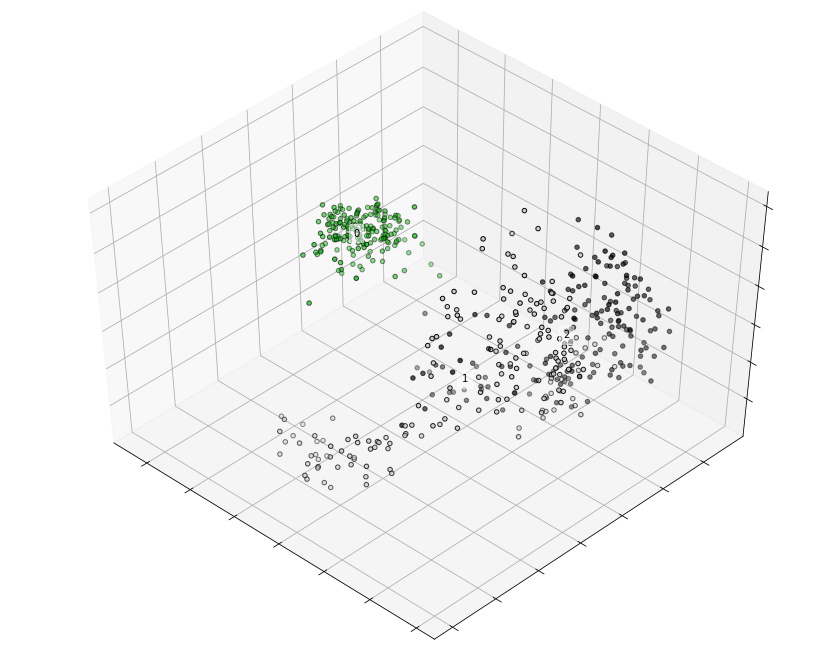

In [4]:
# 資料建模 並 視覺化 結果
pca.fit(X)
X = pca.transform(X)

fig = plt.figure(1, figsize=(12, 9))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()


for name, label in [('0', 0), ('1', 1), ('2', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

In [ ]:
# 參考 https://www.qikegu.com/docs/4080   進行另一種手寫資料集的PCA

In [5]:
from sklearn import datasets
digits = datasets.load_digits()
import matplotlib.pyplot as plt

In [17]:
# 创建一个随机的PCA模型，该模型包含两个组件
from sklearn.decomposition import PCA
randomized_pca = PCA(n_components=2, svd_solver='randomized')

# 拟合数据并将其转换为模型
reduced_data_rpca = randomized_pca.fit_transform(digits.data)

# 创建一个常规的PCA模型 
pca = PCA(n_components=2)

# 拟合数据并将其转换为模型
reduced_data_pca = pca.fit_transform(digits.data)

# 检查形状
reduced_data_pca.shape

# 打印数据
print(reduced_data_rpca)
print(reduced_data_pca)

[[ -1.25946727  21.27488588]
 [  7.95760769 -20.76869421]
 [  6.99192594  -9.95599178]
 ...
 [ 10.80128484  -6.96025179]
 [ -4.87210619  12.42395684]
 [ -0.34438582   6.3655459 ]]
[[ -1.25947144  21.27489858]
 [  7.95761669 -20.76872584]
 [  6.99192552  -9.95598764]
 ...
 [ 10.80127602  -6.96022326]
 [ -4.87210224  12.42396686]
 [ -0.34440006   6.3655942 ]]


In [ ]:
'''
随机的PCA模型在维数较多时性能更好。可以比较常规PCA模型与随机PCA模型的结果，看看有什么不同。

告诉模型保留两个组件，是为了确保有二维数据可用来绘图。

现在可以绘制一个散点图来可视化数据:
'''

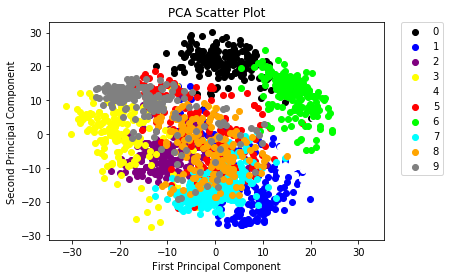

In [18]:
colors = ['black', 'blue', 'purple', 'yellow', 'white', 'red', 'lime', 'cyan', 'orange', 'gray']

# 根据主成分分析结果绘制散点图
for i in range(len(colors)):
    x = reduced_data_rpca[:, 0][digits.target == i]
    y = reduced_data_rpca[:, 1][digits.target == i]
    plt.scatter(x, y, c=colors[i])

# 设置图例，0-9用不同颜色表示
plt.legend(digits.target_names, bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
# 设置坐标标签
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
# 设置标题
plt.title("PCA Scatter Plot")

# 显示图形
plt.show()